In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
import numpy as np
import pandas as pd

In [2]:
digits = load_digits()

In [3]:
images = digits["data"]
numbers = digits['target']

### Train Test split

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(images,numbers,test_size=0.2,random_state=23)

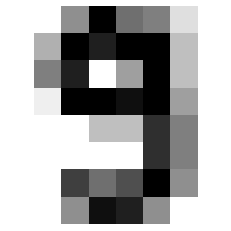

In [5]:
plt.imshow(X_train[0].reshape((8,8)), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [6]:
X_train[0]

array([ 0.,  0.,  7., 16.,  9.,  8.,  2.,  0.,  0.,  5., 16., 14., 16.,
       16.,  4.,  0.,  0.,  8., 14.,  0.,  6., 16.,  4.,  0.,  0.,  1.,
       16., 16., 15., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  4., 13.,  8.,
        0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0., 12.,  9.,
       11., 16.,  7.,  0.,  0.,  0.,  7., 15., 14.,  7.,  0.,  0.])

In [7]:
pd.Series(Y_train).value_counts()

3    154
7    151
6    150
0    148
1    142
4    141
2    139
9    138
5    138
8    136
Name: count, dtype: int64

### Logistic Regression (SoftMax)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [9]:
model =  LogisticRegression(max_iter=10000,C=100)

In [10]:
model.fit(X_train,Y_train)

LogisticRegression(C=100, max_iter=10000)

In [11]:
y_train_pred = model.predict(X_train)

In [12]:
confusion_matrix(Y_train,y_train_pred)

array([[148,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 139,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 154,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 141,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 138,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 150,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 151,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 136,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 138]], dtype=int64)

In [13]:
y_pred_prob = model.predict_proba(X_train)
pd.DataFrame(np.round(y_pred_prob,2))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1432,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


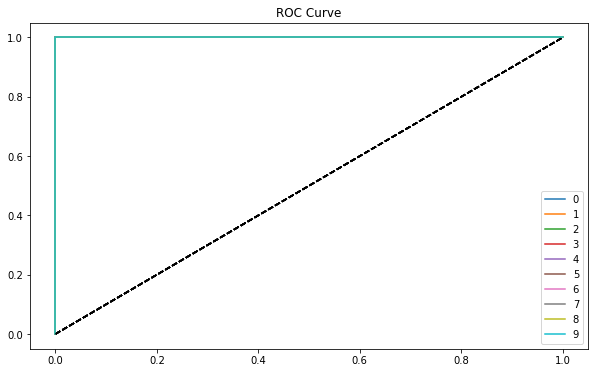

In [14]:
plt.figure(figsize=(10,6))
for i in range(10):
    fpr,tpr,_  = roc_curve(Y_train==i,y_pred_prob[:,i])
    plt.plot(fpr,tpr,label = i)
    plt.plot(fpr,fpr,ls="--",color="k")
    plt.legend()
    #plt.text(0.85,0.2,f"ROC-AUC: {roc_auc_score(Y_train==i,y_pred_prob[:,i])}",bbox=dict(facecolor='white', alpha=0.5))
plt.title("ROC Curve")
plt.show()

In [15]:
accuracy_score(Y_train,y_train_pred)

1.0

In [16]:
score_accuracy = make_scorer(accuracy_score)

In [17]:
soft_max_cv_scores = cross_val_score(model,X_train,Y_train,cv=10,scoring=score_accuracy)

In [18]:
y_test_pred = model.predict(X_test)

In [19]:
confusion_matrix(Y_test,y_test_pred)

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  1,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  2,  0,  0,  0,  3,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  1, 39]], dtype=int64)

In [20]:
test_acc = accuracy_score(Y_test,y_test_pred)

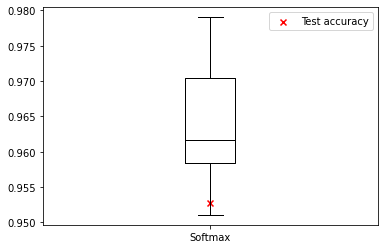

In [21]:
plt.boxplot(soft_max_cv_scores,labels = ["Softmax"],medianprops={"color":"k"})
plt.scatter(x=1,y=test_acc,marker="x",color="red",label = "Test accuracy")
plt.legend()
plt.show()

**Hyper Parameter Tuning**

In [22]:
model.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
grid_search = GridSearchCV(model,{"C":[0.1,1,10,100,1000,10000]},scoring=score_accuracy,cv=10)

In [24]:
cv_results = grid_search.fit(X_train,Y_train)

In [25]:
cv_results.best_params_

{'C': 0.1}

In [26]:
test_acc = []
for i in cv_results.cv_results_["param_C"]:
    param = {"C":i}
    model.set_params(**param)
    model.fit(X_train,Y_train)
    test_acc.append(accuracy_score(Y_test,model.predict(X_test)))

In [27]:
test_acc

[0.9638888888888889,
 0.9638888888888889,
 0.9611111111111111,
 0.9527777777777777,
 0.9555555555555556,
 0.9611111111111111]

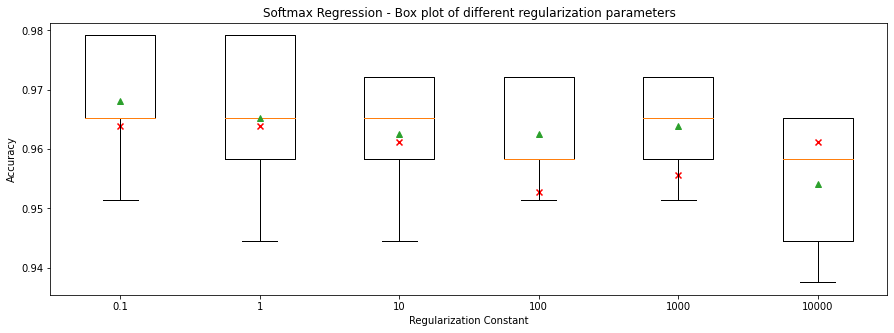

In [28]:
plt.figure(figsize = (15,5))
df = pd.DataFrame(cv_results.cv_results_)
plt.boxplot(df[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"]].T,
           showmeans=True,labels=df["param_C"])
plt.scatter(range(1,len(df["param_C"])+1),test_acc,marker="x",color="red")
plt.title("Softmax Regression - Box plot of different regularization parameters")
plt.xlabel("Regularization Constant")
plt.ylabel("Accuracy")
plt.show()

### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
KNN_model = KNeighborsClassifier()

In [31]:
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
KNN_pred_train = KNN_model.predict(X_train)
KNN_prob_train = KNN_model.predict_proba(X_train)

In [33]:
confusion_matrix(Y_train,KNN_pred_train)

array([[148,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 139,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 151,   0,   0,   0,   2,   1,   0],
       [  0,   0,   0,   0, 141,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 136,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 149,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 150,   0,   1],
       [  0,   2,   0,   1,   0,   0,   1,   0, 132,   0],
       [  0,   0,   0,   2,   1,   1,   0,   0,   0, 134]], dtype=int64)

In [34]:
accuracy_score(Y_train,KNN_pred_train)

0.9895615866388309

In [35]:
KNN_cv_scores = cross_val_score(KNN_model,X_train,Y_train,scoring = score_accuracy,cv=10)

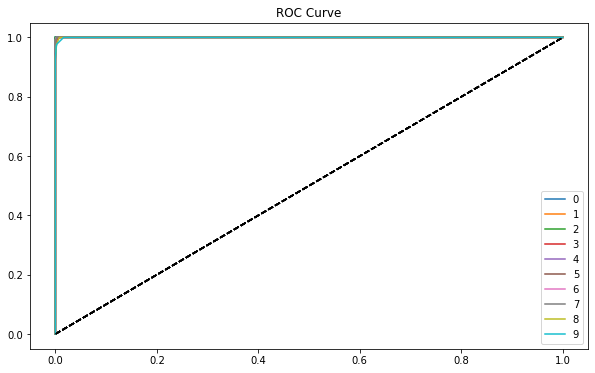

In [36]:
plt.figure(figsize=(10,6))
for i in range(10):
    fpr,tpr,_  = roc_curve(Y_train==i,KNN_prob_train[:,i])
    plt.plot(fpr,tpr,label = i)
    plt.plot(fpr,fpr,ls="--",color="k")
    plt.legend()
    #plt.text(0.85,0.2,f"ROC-AUC: {roc_auc_score(Y_train==i,y_pred_prob[:,i])}",bbox=dict(facecolor='white', alpha=0.5))
plt.title("ROC Curve")
plt.show()

In [37]:
KNN_pred_test = KNN_model.predict(X_test)
KNN_prob_test = KNN_model.predict_proba(X_test)

In [38]:
KNN_test_acc = accuracy_score(Y_test,KNN_pred_test)

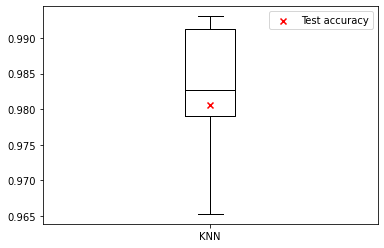

In [39]:
plt.boxplot(KNN_cv_scores,labels = ["KNN"],medianprops={"color":"k"})
plt.scatter(x=1,y=KNN_test_acc,marker="x",color="red",label = "Test accuracy")
plt.legend()
plt.show()

**Hyper Parameter Tuning**

In [40]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
params_grid = {"n_neighbors":range(1,10),"weights":["uniform","distance"]}

In [42]:
KNN_search = GridSearchCV(KNN_model,params_grid,cv=10,scoring=score_accuracy)

In [43]:
KNN_cv_results = KNN_search.fit(X_train,Y_train)

In [44]:
KNN_cv_results.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [45]:
KNN_df = pd.DataFrame(KNN_cv_results.cv_results_)

In [46]:
KNN_test_acc_dict = {"uniform":[],"distance":[]}
for i in params_grid["weights"]:
    for j in params_grid["n_neighbors"]:
        params = {"n_neighbors":j,"weights":i}
        KNN_model.set_params(**params)
        KNN_model.fit(X_train,Y_train)
        KNN_test_acc_dict[i].append(accuracy_score(Y_test,KNN_model.predict(X_test)))

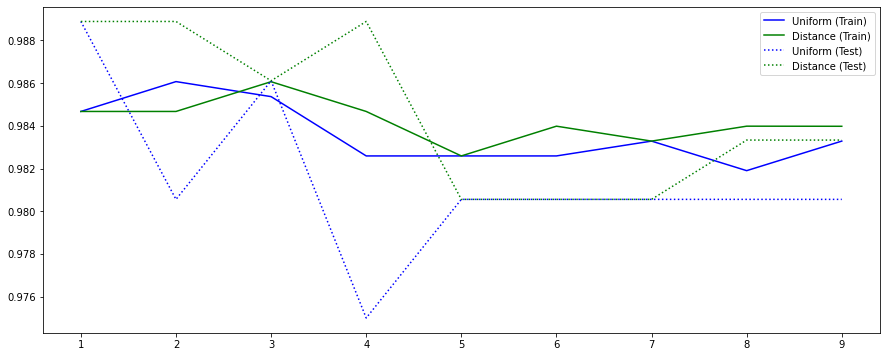

In [47]:
plt.figure(figsize=(15,6))
subset = KNN_df[KNN_df.param_weights=="uniform"]
plt.plot(subset["param_n_neighbors"],subset["mean_test_score"],color="blue",label="Uniform (Train)")
subset = KNN_df[KNN_df.param_weights=="distance"]
plt.plot(subset["param_n_neighbors"],subset["mean_test_score"],color="green",label="Distance (Train)")
plt.plot(subset["param_n_neighbors"],KNN_test_acc_dict["uniform"],color="blue",ls=":",label = "Uniform (Test)")
plt.plot(subset["param_n_neighbors"],KNN_test_acc_dict["distance"],color="green",ls=":",label = "Distance (Test)")
plt.legend()

### Comparison of both models

In [48]:
accuracy_score(Y_test,cv_results.best_estimator_.predict(X_test))

0.9638888888888889

In [49]:
accuracy_score(Y_test,KNN_cv_results.best_estimator_.predict(X_test))

0.9805555555555555